In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pbmaster as m
#import master as m
import healpy as h
import harm_filter as f

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


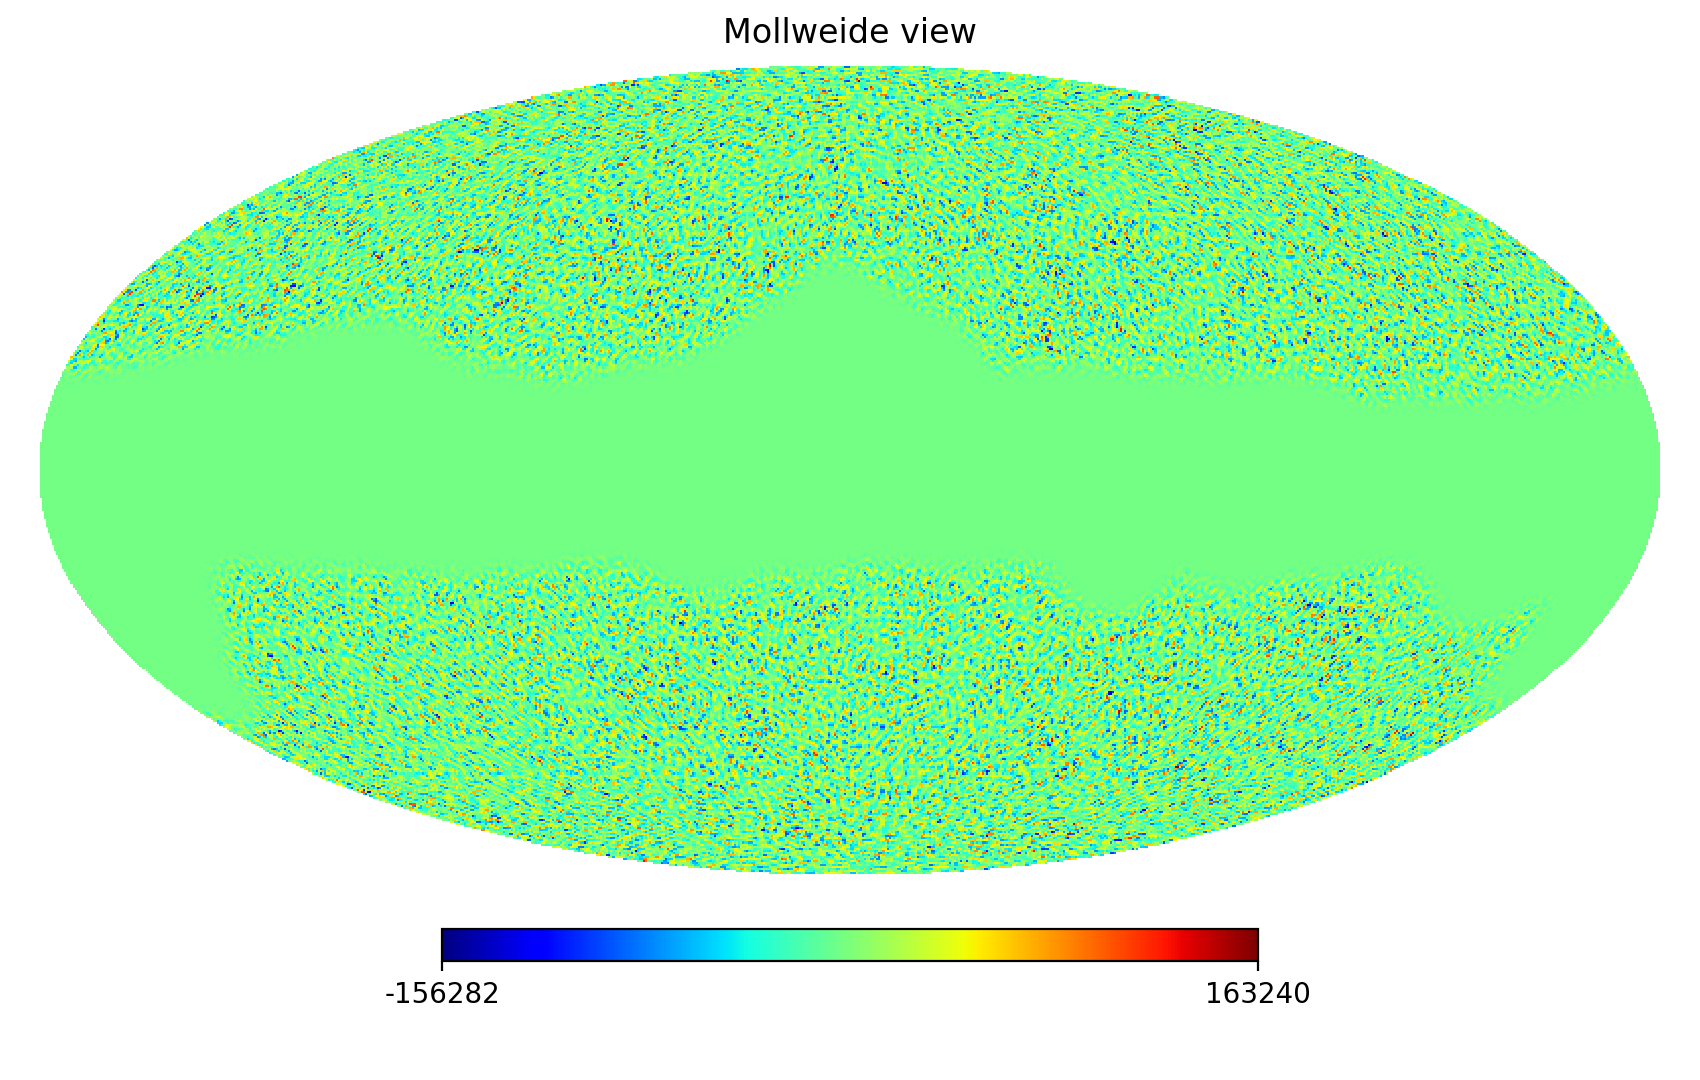

In [3]:
mask=h.read_map("../data/mask_gal70_nside512.fits",verbose=False) ; fsky=sum(mask/size(mask))
cl=h.read_cl("../data/planck_wp_highL_lensing_param.fits")[1]

mask=h.ud_grade(mask,128)
nside=h.get_nside(mask) ; lmax=2*nside
cmb=h.synfast(cl,nside,verbose=False)
cmbalm=h.map2alm(cmb,lmax=lmax)
clum=h.alm2cl(cmbalm)

for i in range(cmbalm.size):
    ell=h.Alm.getlm(lmax,i)[0]
    f=0.
    if ell>1:
        f=sqrt((ell+2)*(ell+1)*ell*(ell-1))
    cmbalm[i]=cmbalm[i]*f
    
cmb=h.alm2map(cmbalm,nside)
h.mollview(cmb*mask)

# Unbinned master

<IPython.core.display.Javascript object>


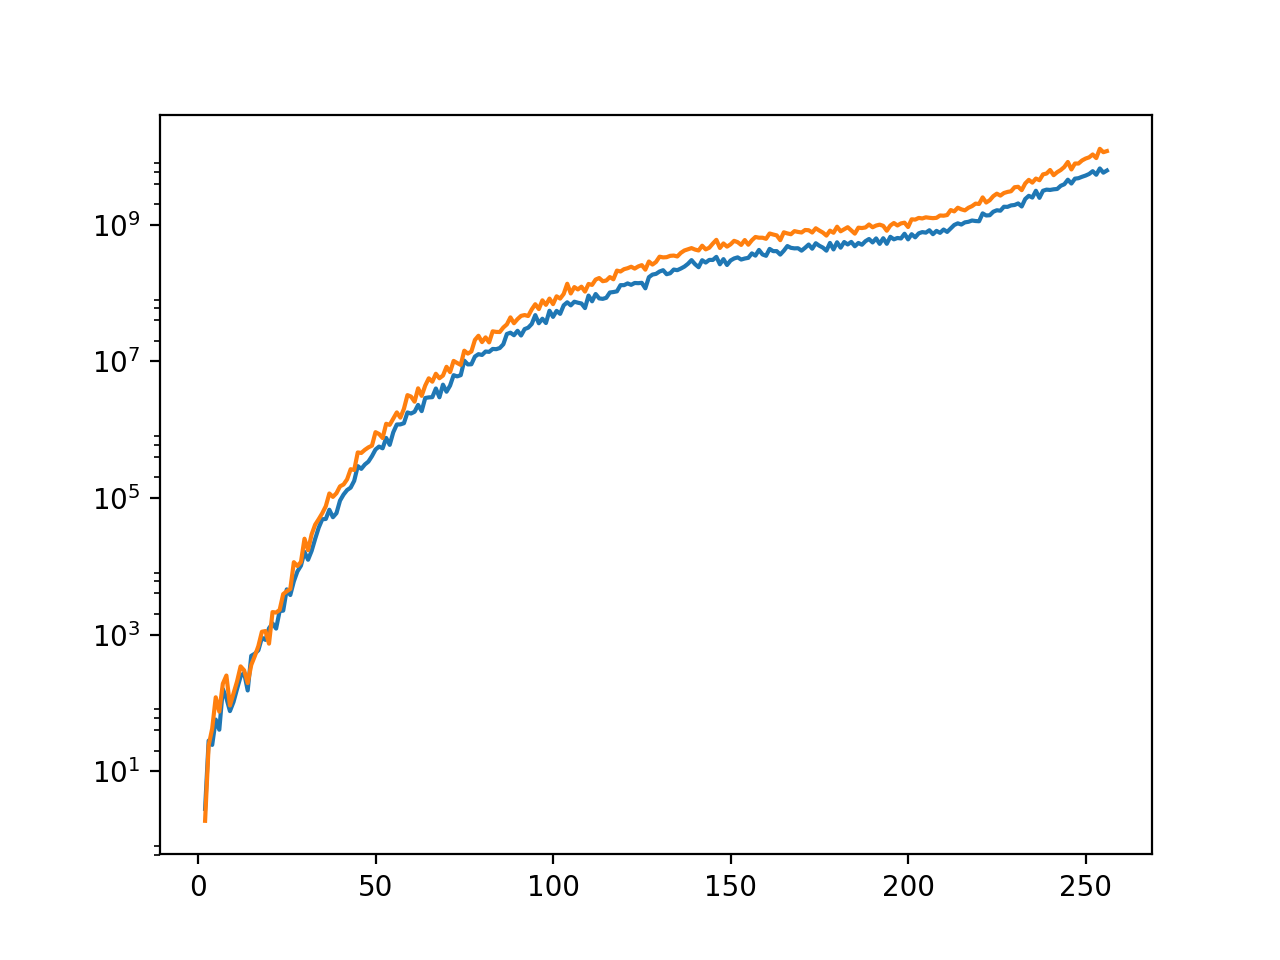

<IPython.core.display.Javascript object>


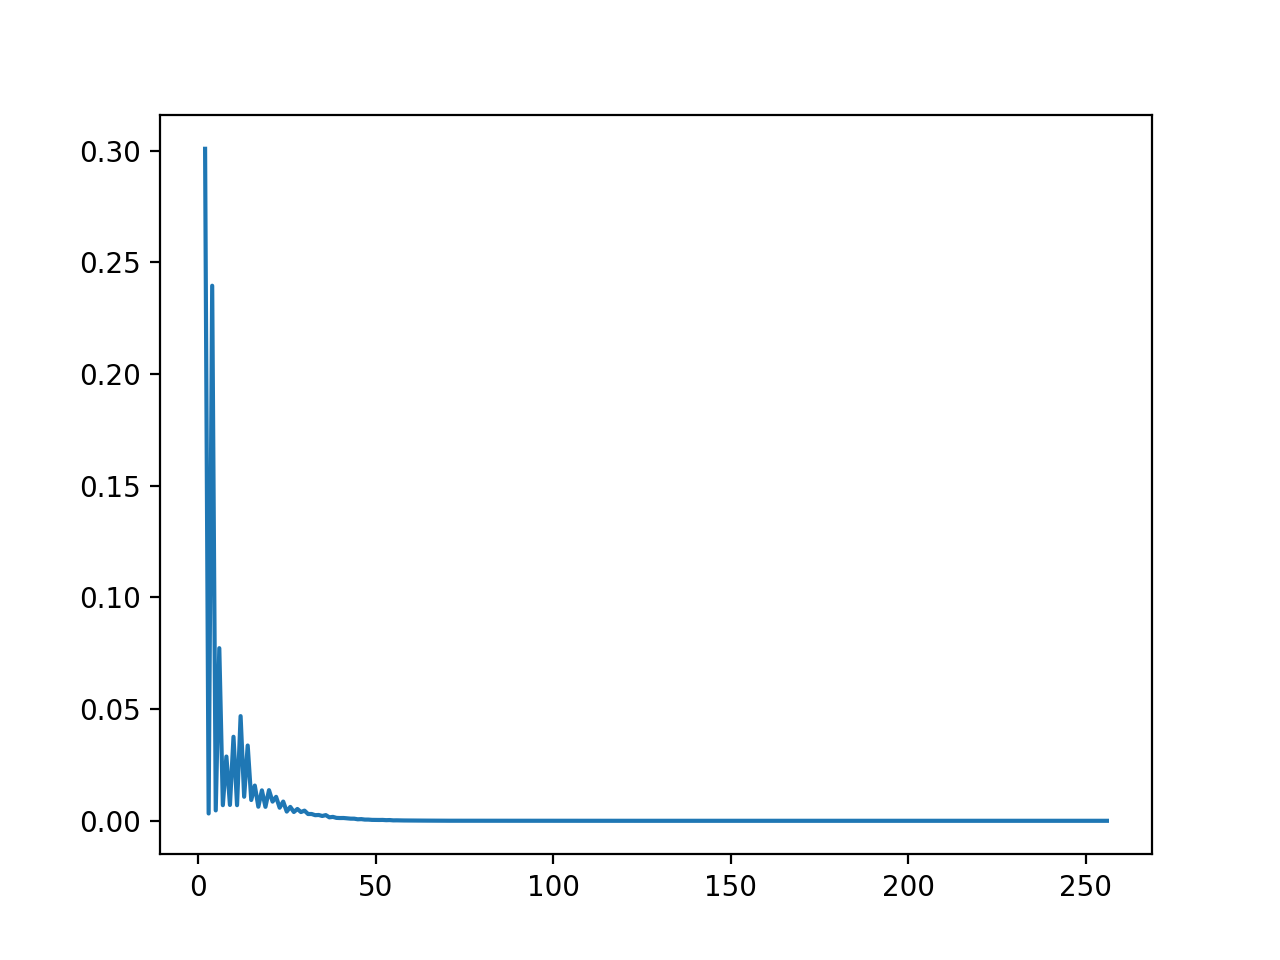

In [4]:
#mask=h.read_map("../master-power-spectrum-estimation_v0/data/in/mask1.fits",verbose=False) ; fsky=sum(mask/size(mask))
lmin=2; lmax=lmax ; masklmax=lmax ; ell=linspace(lmin,lmax,lmax-lmin+1) ; f=ell*(ell+1)/(2.*pi)

wl=h.alm2cl(h.map2alm(mask,lmax=masklmax))
cld=h.alm2cl(h.map2alm(cmb,lmax=lmax))[lmin:lmax+1]
clm=h.alm2cl(h.map2alm(cmb*mask,lmax=lmax))[lmin:lmax+1]

figure()
plot(ell,f*clm)
plot(ell,f*cld)
semilogy()

figure()
plot(ell,f*wl[2:])
#loglog()

<IPython.core.display.Javascript object>


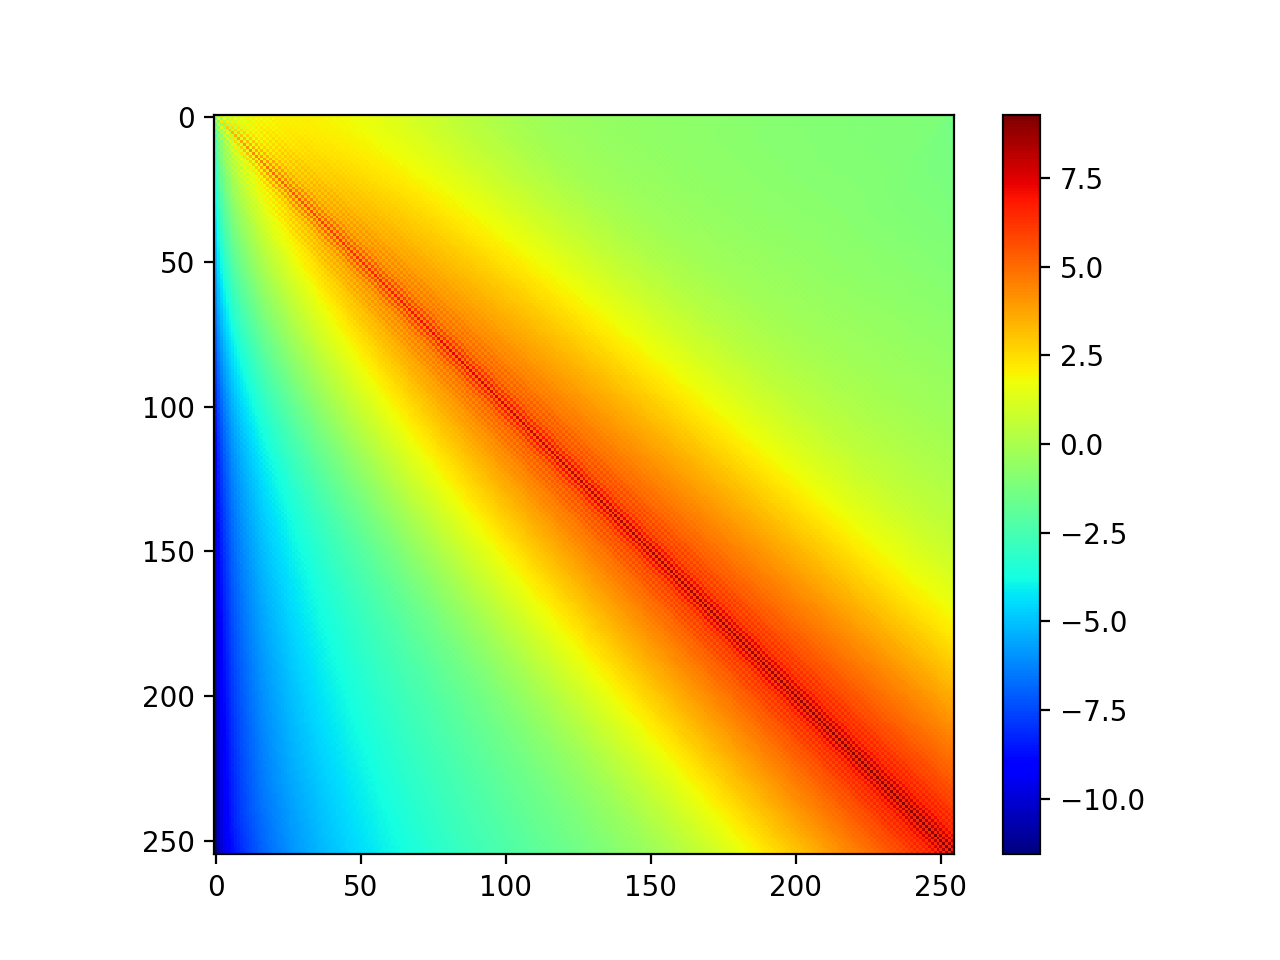

In [5]:
# Evaluate the mask coupling matrix
mllp=m.master.calc_kernel(wl,2,lmax,masklmax)

figure()
imshow(log10(mllp))
colorbar()

<IPython.core.display.Javascript object>


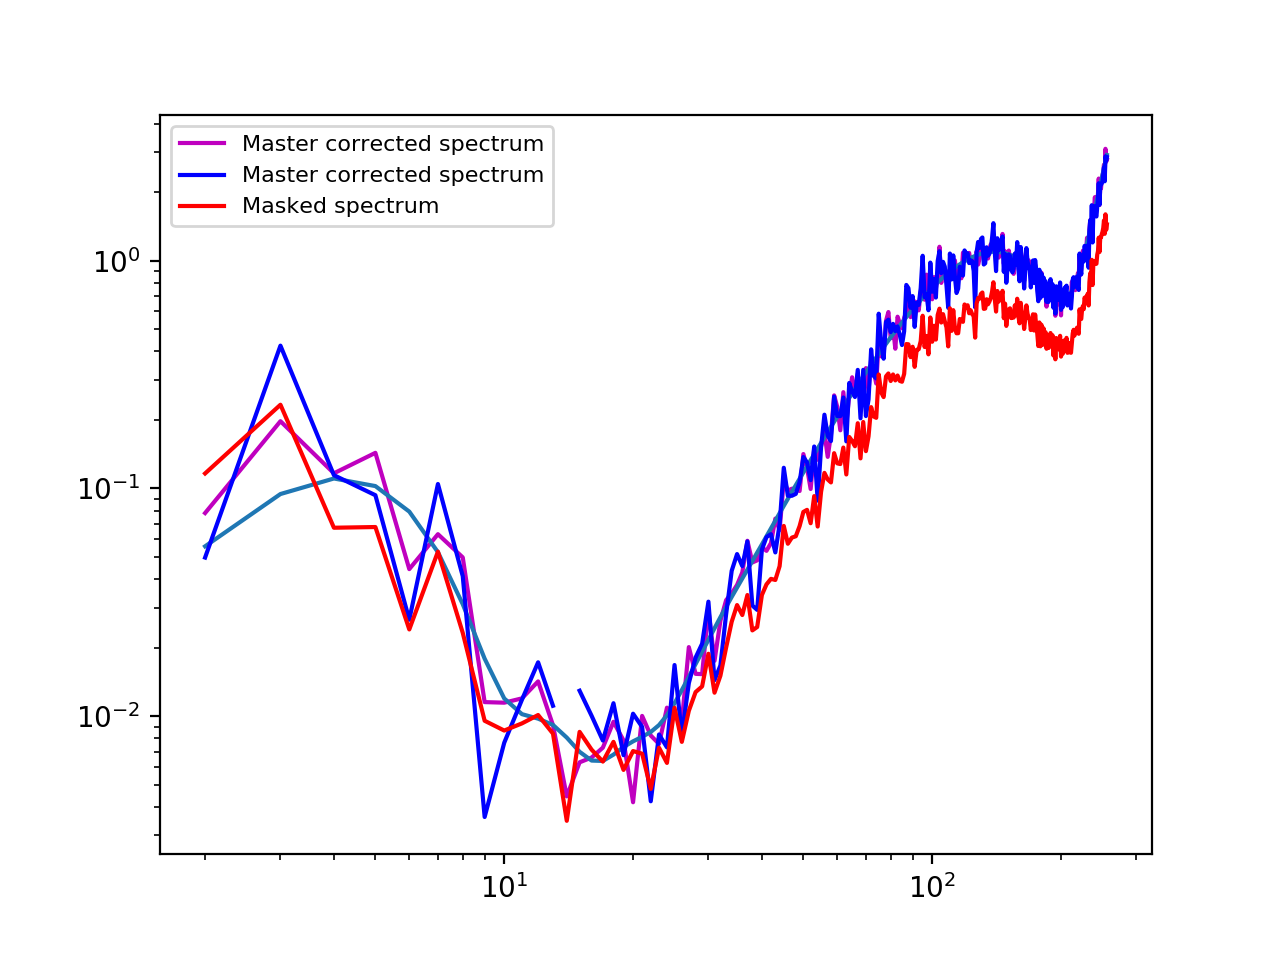

[]

In [13]:
cltemp=zeros(clm.size,float) ; cltemp[:]=clm[:]
clnew=m.master.est_true_cl(cltemp,mllp,lmax-lmin+1)

figure()
plot(ell,cld/((ell+2)*(ell-1)*2.*pi),"m-",label="Master corrected spectrum")
plot(ell,f*cl[2:lmax+1])
plot(ell,f*clnew,"b-",label="Master corrected spectrum")
plot(ell,clm/((ell+2)*(ell-1)*2.*pi),"r-",label="Masked spectrum")
#plot(f*clm/fsky,"g-",label="Masked spectrum - fsky corrected")
legend(loc=0,fontsize=8)
loglog()

# Binned master

In [14]:
deltal=32 ; totl=lmax-lmin+1
nbin=int(ceil(totl*1./deltal)) ; print nbin
pbl=zeros((nbin,lmax-lmin+1),float) ; qlb=zeros((lmax-lmin+1,nbin),float)
lbin=[]
for i in range(nbin):
    bmin=i*deltal
    bmax=min(bmin+deltal-1,lmax-lmin)
    ll=linspace(bmin+lmin,bmax+lmin,bmax-bmin+1)
    lbin=append(lbin,int(mean(ll)))
    #print bmin,bmax,ll
    norm=len(ll)
    f1=ll*(ll+1)/(2.*pi*norm)
    g1=2.*pi/(ll*(ll+1)) 
    pbl[i,bmin:bmax+1]=f1
    qlb[bmin:bmax+1,i]=g1
    
flbin=lbin*(lbin+1)/(2.*pi)
#print bmin,bmax,norm

8


<IPython.core.display.Javascript object>


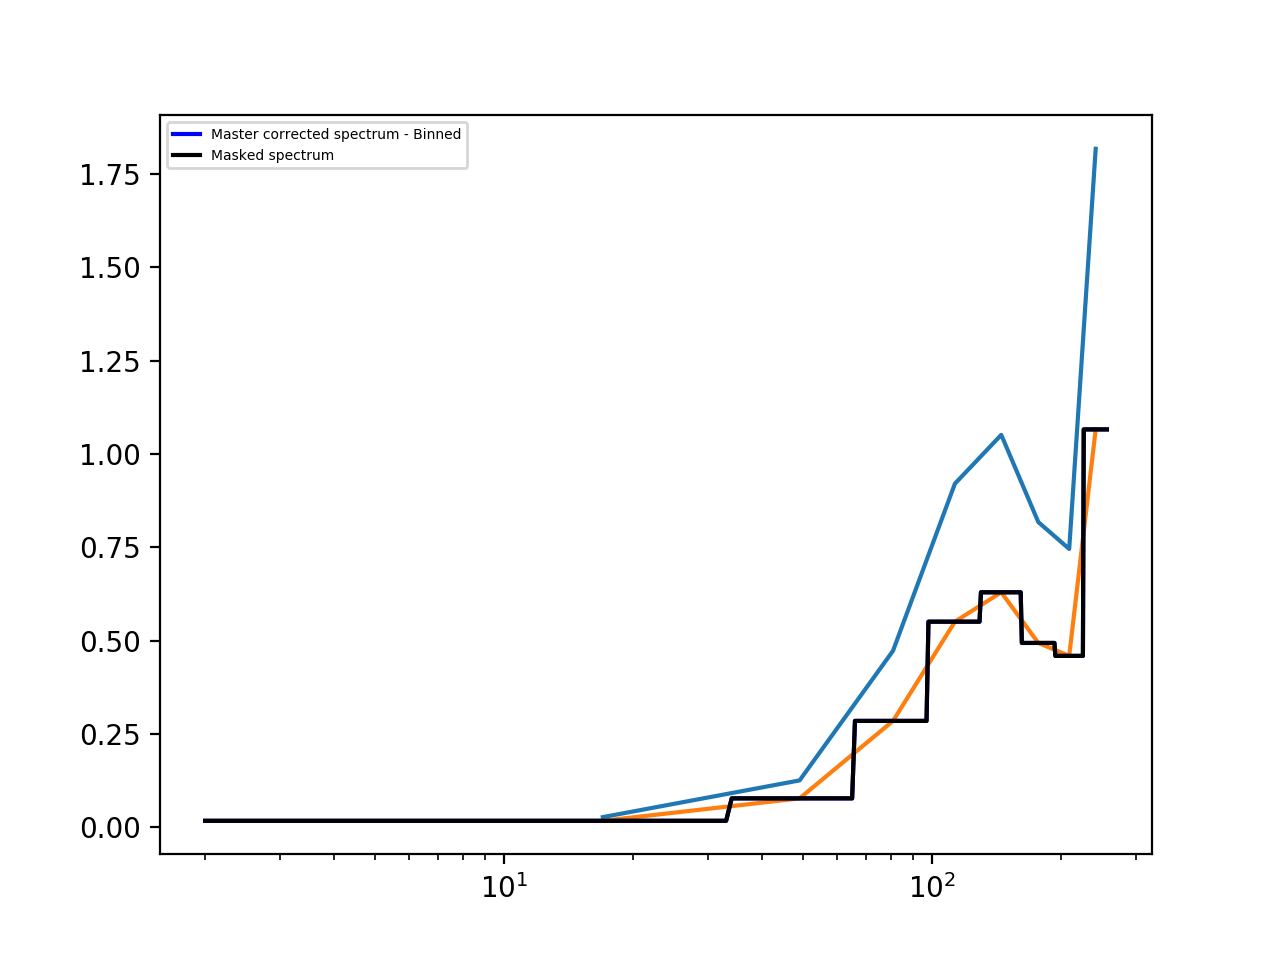

[]

In [9]:
mbbp=array(matrix(pbl)*matrix(mllp)*matrix(qlb))
bcl=array(matrix(pbl)*transpose(matrix(clm)))[:,0]
bcltemp=zeros(len(bcl),float) ; bcltemp[:]=bcl[:]
blt_out=m.master.est_true_cl(bcltemp,mbbp,len(bcl))

bcls=array(matrix(qlb)*transpose(matrix(bcl)))[:,0]
bcltemps=array(matrix(qlb)*transpose(matrix(bcltemp)))[:,0]

figure()
plot(lbin,blt_out)
plot(lbin,bcl)
plot(ell,f*bcltemps,"b-",label="Master corrected spectrum - Binned")
plot(ell,f*bcls,"k-",label="Masked spectrum")
legend(loc=0,fontsize=5)
semilogx()

<IPython.core.display.Javascript object>


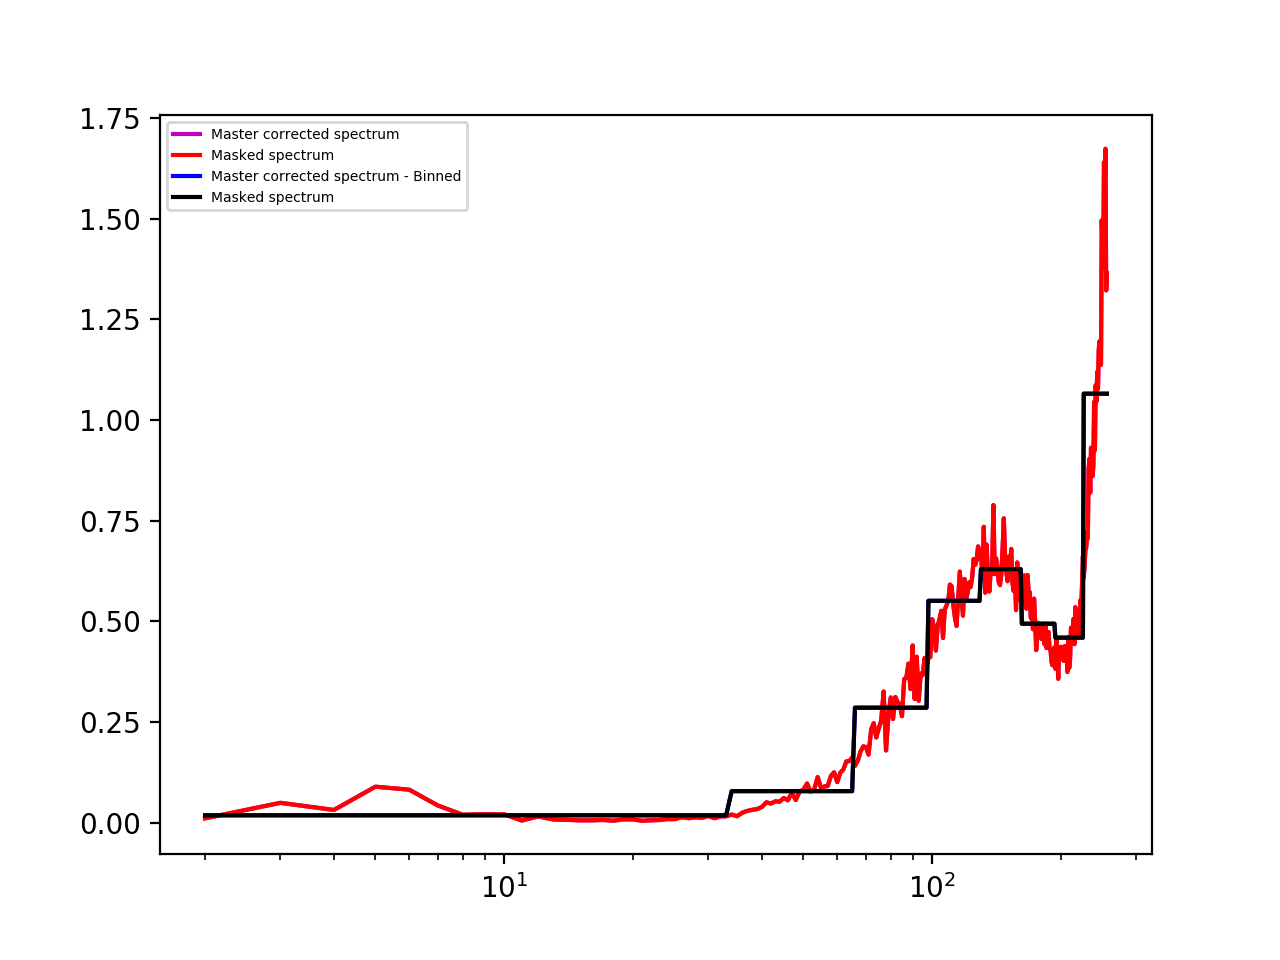

[]

In [10]:
figure()
plot(ell,f*cltemp,"m-",label="Master corrected spectrum")
plot(ell,f*clm,"r-",label="Masked spectrum")
plot(ell,f*bcltemps,"b-",label="Master corrected spectrum - Binned")
plot(ell,f*bcls,"k-",label="Masked spectrum")
legend(loc=0,fontsize=5)
#xlim(0,60)
semilogx()

<IPython.core.display.Javascript object>


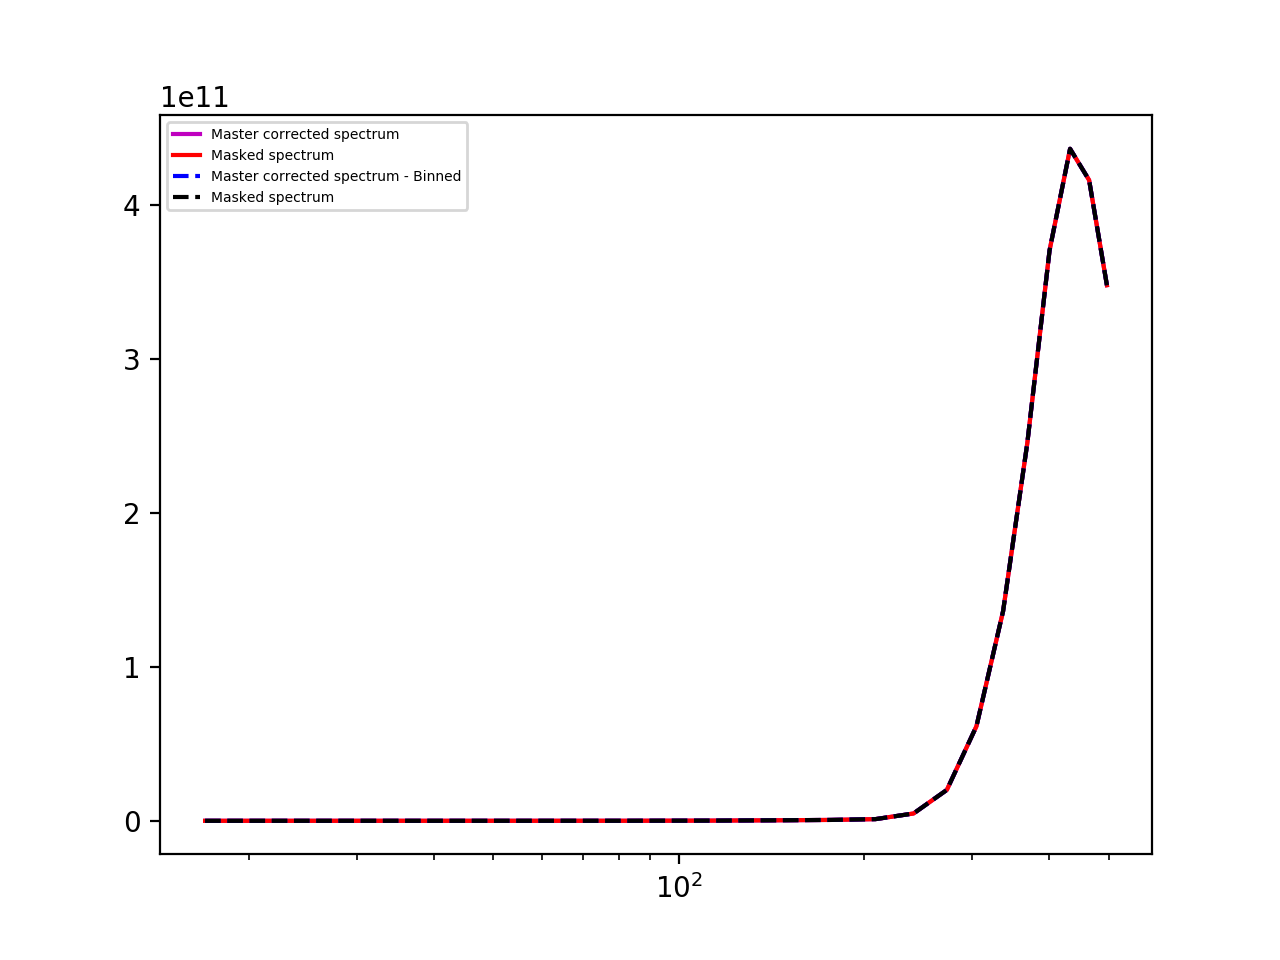

[]

In [16]:
figure()
plot(lbin,array(matrix(pbl)*transpose(matrix(cltemp)))[:,0],"m-",label="Master corrected spectrum")
plot(lbin,array(matrix(pbl)*transpose(matrix(clm)))[:,0],"r-",label="Masked spectrum")
plot(lbin,bcltemp,"b--",label="Master corrected spectrum - Binned")
plot(lbin,bcl,"k--",label="Masked spectrum")
legend(loc=0,fontsize=5)
#xlim(0,60)
semilogx()

In [19]:
print wl[2:3]
print wl[2]

[ 0.31505004]
0.315050044074
